# Libraries

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, VotingClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

# Dataset Exploration:

In [591]:
file_path = "Ireland House Price.csv"  
df = pd.read_csv(file_path)
df

,ID,property_scope,availability,location,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$
0,0,Extended Coverage,17-Oct,Fingal,2 BED,1056,2.0,1.0,No,A,No,419.928030
1,1,Land Parcel,Ready To Move,South Dublin,4 Bedroom,2600,5.0,3.0,No,D,Yes,523.846154
2,2,Constructed Space,Ready To Move,Dun Laoghaire,3 BED,1440,2.0,3.0,No,G,Yes,488.680556
3,3,Extended Coverage,Ready To Move,South Dublin,3 BED,1521,3.0,1.0,No,G,Yes,708.908613
4,4,Extended Coverage,Ready To Move,DCC,2 BED,1200,2.0,1.0,No,F,Yes,482.375000
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,13315,Constructed Space,Ready To Move,Dun Laoghaire,5 Bedroom,3453,4.0,0.0,Yes,B,Maybe,759.296264
13316,13316,Extended Coverage,Ready To Move,Fingal,4 BED,3600,5.0,NaN,No,A,No,1261.111111
13317,13317,Constructed Space,Ready To Move,Fingal,2 BED,1141,2.0,1.0,No,A,No,596.844873
13318,13318,Extended Coverage,18-Jun,South Dublin,4 BED,4689,4.0,1.0,No,C,Maybe,1181.232672


In [592]:
# Function to clean and convert 'total_sqft' column
def clean_total_sqft(value):
    try:
        # Check if the value is a range (e.g., "1200-1500")
        if '-' in str(value):
            values = [float(x) for x in value.split('-')]
            return sum(values) / len(values)  # Return the average
        # Otherwise, convert directly to float
        return float(value)
    except ValueError:
        # Return NaN for any non-numeric or invalid values
        return np.nan

# Apply the function to the 'total_sqft' column
df['total_sqft'] = df['total_sqft'].apply(clean_total_sqft)

# Optionally handle missing values after conversion
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].median())

# Check the conversion
print(df['total_sqft'].head())
print(df['total_sqft'].dtype)

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float64
float64


In [593]:
# Step 1: Remove ' BED' and ' Bedroom' and replace with empty string
df['size'] = df['size'].replace({' BED': '', ' Bedroom': ''}, regex=True)
 
# Step 2: Convert to numeric, force errors to NaN (in case of invalid values)
df['size'] = pd.to_numeric(df['size'], errors='coerce')
 
# Step 3: Handle NaN values (replace with 0 or some other value if needed)
df['size'] = df['size'].fillna(0).astype(int)

In [594]:
df['bath'] = df['bath'].fillna(df['bath'].mode()[0])

In [595]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])

In [596]:
df['price-per-sqft-$'] = df['price-per-sqft-$'].fillna(df['price-per-sqft-$'].median())

In [597]:
df

,ID,property_scope,availability,location,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$
0,0,Extended Coverage,17-Oct,Fingal,2,1056.0,2.0,1.0,No,A,No,419.928030
1,1,Land Parcel,Ready To Move,South Dublin,4,2600.0,5.0,3.0,No,D,Yes,523.846154
2,2,Constructed Space,Ready To Move,Dun Laoghaire,3,1440.0,2.0,3.0,No,G,Yes,488.680556
3,3,Extended Coverage,Ready To Move,South Dublin,3,1521.0,3.0,1.0,No,G,Yes,708.908613
4,4,Extended Coverage,Ready To Move,DCC,2,1200.0,2.0,1.0,No,F,Yes,482.375000
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,13315,Constructed Space,Ready To Move,Dun Laoghaire,5,3453.0,4.0,0.0,Yes,B,Maybe,759.296264
13316,13316,Extended Coverage,Ready To Move,Fingal,4,3600.0,5.0,2.0,No,A,No,1261.111111
13317,13317,Constructed Space,Ready To Move,Fingal,2,1141.0,2.0,1.0,No,A,No,596.844873
13318,13318,Extended Coverage,18-Jun,South Dublin,4,4689.0,4.0,1.0,No,C,Maybe,1181.232672


In [598]:
df.describe()

,ID,size,total_sqft,bath,balcony,price-per-sqft-$
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,6659.500000,2.800375,1558.647202,2.688814,1.603378,1.412975e+03
std,3845.297128,1.297835,1236.376834,1.338754,0.803067,4.568663e+04
min,0.000000,0.000000,1.000000,1.000000,0.000000,3.039868e+01
25%,3329.750000,2.000000,1100.000000,2.000000,1.000000,4.864286e+02
50%,6659.500000,3.000000,1276.000000,2.000000,2.000000,6.190909e+02
75%,9989.250000,3.000000,1678.000000,3.000000,2.000000,8.264949e+02
max,13319.000000,43.000000,52272.000000,40.000000,3.000000,4.953333e+06


In [599]:
df.isnull().sum()

ID                      0
property_scope          0
availability            0
location                1
size                    0
total_sqft              0
bath                    0
balcony                 0
buying or not buying    0
BER                     0
Renovation needed       0
price-per-sqft-$        0
dtype: int64

In [600]:
print("Dataset Shape:", df.shape)
print("Dataset Columns:", df.columns)
print("Dataset Info:\n", df.info())
print("Summary Statistics:\n", df.describe())

Dataset Shape: (13320, 12)
Dataset Columns: Index(['ID', 'property_scope', 'availability', 'location', 'size',
       'total_sqft', 'bath', 'balcony', 'buying or not buying', 'BER',
       'Renovation needed', 'price-per-sqft-$'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13320 non-null  int64  
 1   property_scope        13320 non-null  object 
 2   availability          13320 non-null  object 
 3   location              13319 non-null  object 
 4   size                  13320 non-null  int64  
 5   total_sqft            13320 non-null  float64
 6   bath                  13320 non-null  float64
 7   balcony               13320 non-null  float64
 8   buying or not buying  13320 non-null  object 
 9   BER                   13320 non-null  object 
 10  Renovation needed    

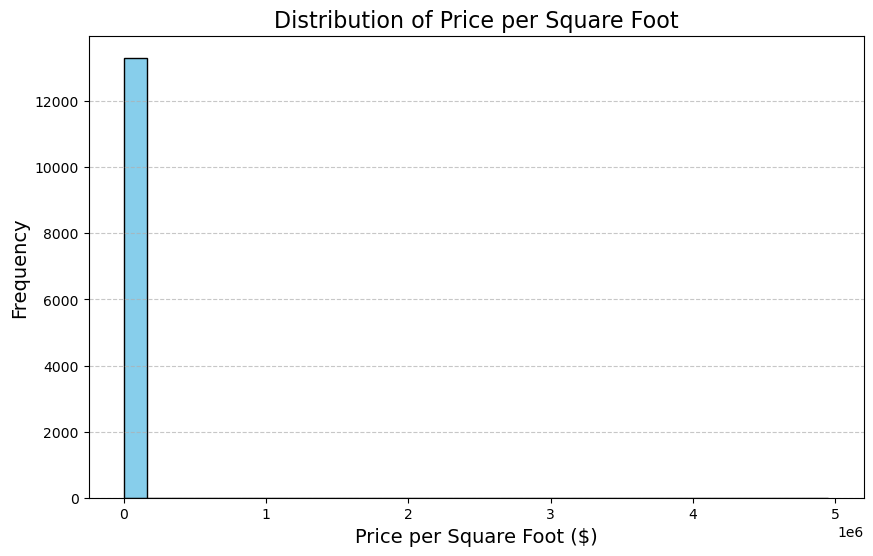

In [601]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price-per-sqft-$'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Price per Square Foot', fontsize=16)
plt.xlabel('Price per Square Foot ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

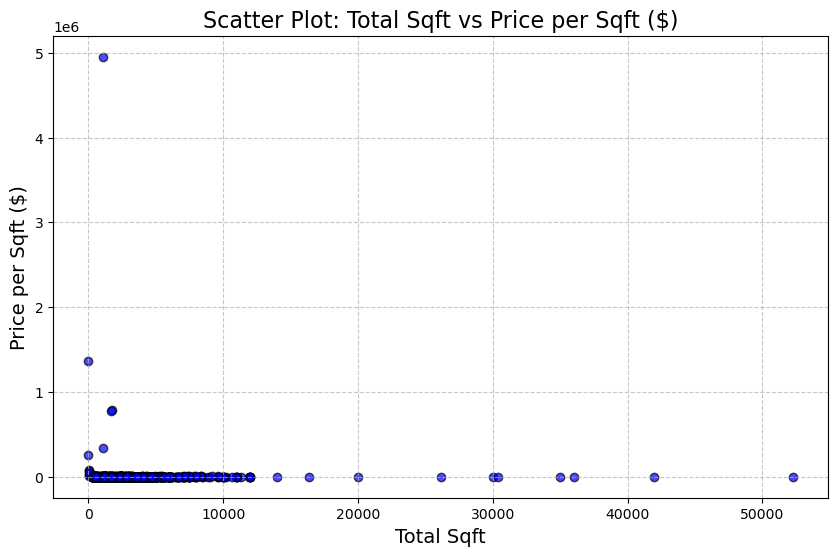

In [602]:
plt.figure(figsize=(10, 6))
plt.scatter(df['total_sqft'], df['price-per-sqft-$'], alpha=0.7, color='blue', edgecolor='k')
plt.title('Scatter Plot: Total Sqft vs Price per Sqft ($)', fontsize=16)
plt.xlabel('Total Sqft', fontsize=14)
plt.ylabel('Price per Sqft ($)', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

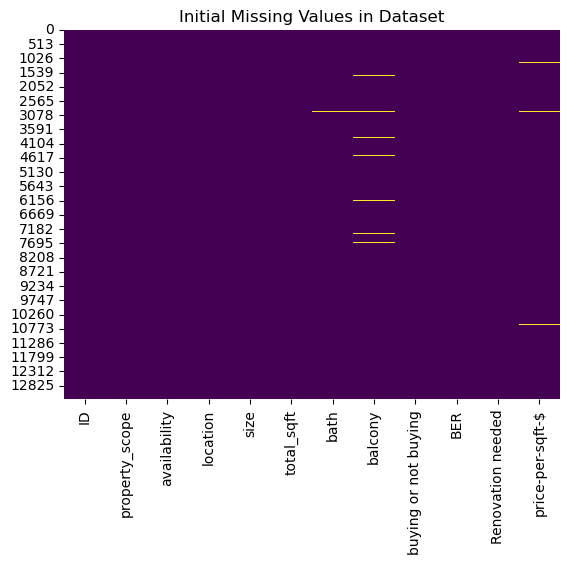

In [603]:
df1 = pd.read_csv(file_path)
df1

sns.heatmap(df1.isnull(), cbar=False, cmap="viridis")
plt.title("Initial Missing Values in Dataset")
plt.show()

# Data Preparation & Feature Engineering:

In [605]:
# Clean Column Names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')
print("Updated Column Names:", df.columns)

Updated Column Names: Index(['ID', 'property_scope', 'availability', 'location', 'size',
       'total_sqft', 'bath', 'balcony', 'buying_or_not_buying', 'BER',
       'Renovation_needed', 'price_per_sqft_$'],
      dtype='object')


In [606]:
# Fill missing values for categorical columns with mode (bath and balcony)
df['bath'] = df['bath'].fillna(df['bath'].mode()[0])
df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])

# Fill missing values for price_per_sqrft with median
df['price_per_sqft_$'] = df['price_per_sqft_$'].fillna(df['price_per_sqft_$'].median())

In [607]:
# Fill missing categorical columns with 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

In [608]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
ID                      0
property_scope          0
availability            0
location                0
size                    0
total_sqft              0
bath                    0
balcony                 0
buying_or_not_buying    0
BER                     0
Renovation_needed       0
price_per_sqft_$        0
dtype: int64


# Outliers Handling:

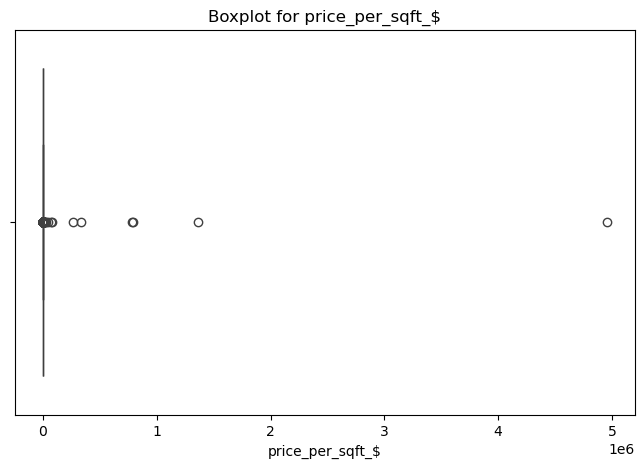

In [609]:
# Handle Outliers
# Plot boxplot for 'price_per_sqft_$'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price_per_sqft_$'])
plt.title('Boxplot for price_per_sqft_$')
plt.show()

In [610]:
# Capping outliers using the 1.5*IQR rule
q1 = df['price_per_sqft_$'].quantile(0.25)
q3 = df['price_per_sqft_$'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['price_per_sqft_$'] = np.where(df['price_per_sqft_$'] > upper_bound, upper_bound, df['price_per_sqft_$'])
df['price_per_sqft_$'] = np.where(df['price_per_sqft_$'] < lower_bound, lower_bound, df['price_per_sqft_$'])

In [611]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

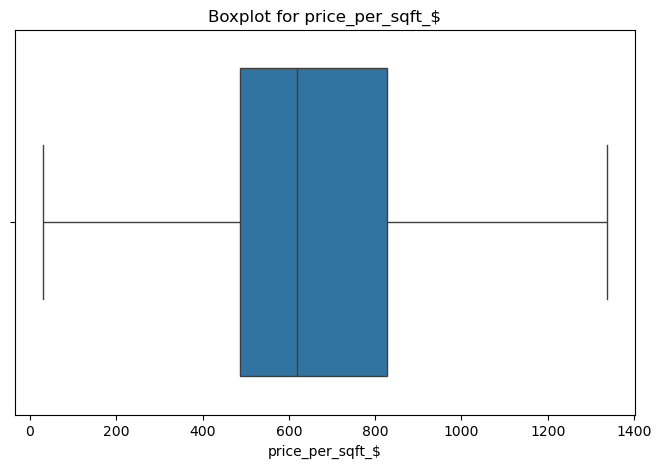

In [612]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price_per_sqft_$'])
plt.title('Boxplot for price_per_sqft_$')
plt.show()

In [613]:
corr = df.corr()
corr

,ID,property_scope,availability,location,size,total_sqft,bath,balcony,buying_or_not_buying,BER,Renovation_needed,price_per_sqft_$
ID,1.000000,-0.004508,-0.012044,-0.006335,-0.007607,-0.004827,-0.005159,-0.000014,0.006692,0.007951,0.012134,-0.000491
property_scope,-0.004508,1.000000,-0.011481,0.039063,0.239715,0.038291,0.231787,-0.012921,-0.001318,0.000881,0.000082,0.345295
availability,-0.012044,-0.011481,1.000000,0.080716,0.084745,0.014563,0.064511,0.102746,-0.021425,0.014991,0.021907,0.103504
location,-0.006335,0.039063,0.080716,1.000000,0.089852,0.014759,0.065703,0.011616,0.011202,-0.003312,-0.000735,0.082624
size,-0.007607,0.239715,0.084745,0.089852,1.000000,0.343956,0.894434,0.192943,0.001612,0.011572,0.003473,0.421441
total_sqft,-0.004827,0.038291,0.014563,0.014759,0.343956,1.000000,0.387513,0.154461,-0.005748,0.004268,-0.000643,0.156626
bath,-0.005159,0.231787,0.064511,0.065703,0.894434,0.387513,1.000000,0.207970,0.002475,0.013617,0.008455,0.444340
balcony,-0.000014,-0.012921,0.102746,0.011616,0.192943,0.154461,0.207970,1.000000,-0.009660,0.009565,-0.005884,0.051668
buying_or_not_buying,0.006692,-0.001318,-0.021425,0.011202,0.001612,-0.005748,0.002475,-0.009660,1.000000,-0.140810,-0.063730,-0.009280
BER,0.007951,0.000881,0.014991,-0.003312,0.011572,0.004268,0.013617,0.009565,-0.140810,1.000000,0.731094,0.010823


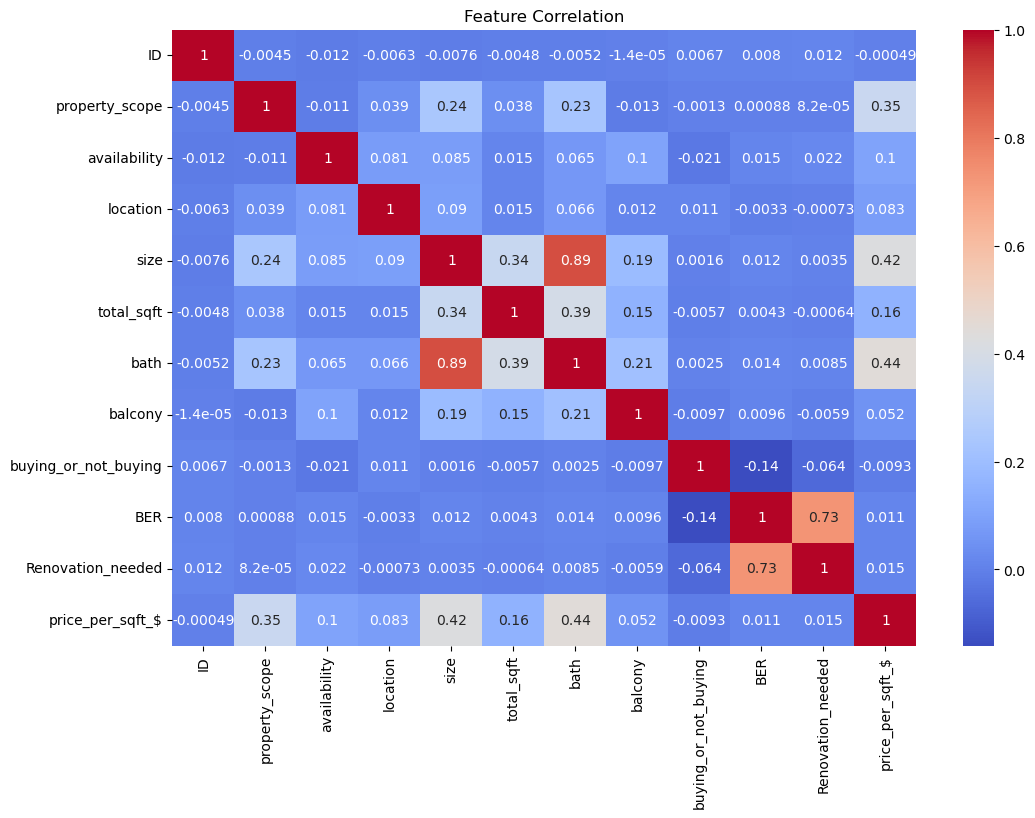

In [614]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [615]:
# Replace 'buying or not buying' with your target column name if different
target = "buying or not buying"

# Check if the target column exists in the dataset
if target in df.columns:
    sns.histplot(df[target], kde=True)
    plt.title("Target Variable Distribution")
    plt.show()

In [616]:
# Initial insights: group data by key categories for summary
print("\nProperty Type Distribution:")
print(df['property_scope'].value_counts())


Property Type Distribution:
property_scope
1    8790
0    2418
2    2025
3      87
Name: count, dtype: int64


In [617]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

In [618]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

In [619]:
# Create new features
df['total_price_$'] = df['price_per_sqft_$'] * df['total_sqft']  # Total price
df['price_bath_ratio'] = df['total_price_$'] / (df['bath'] + 1)  # Avoid zero division
df['log_total_sqft'] = np.log1p(df['total_sqft'])  # Log transformation for skewed data

In [620]:
# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'.")


Cleaned dataset saved as 'cleaned_dataset.csv'.


In [621]:
# Scale numerical features
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

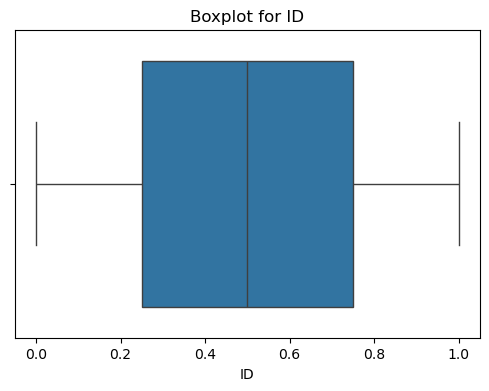

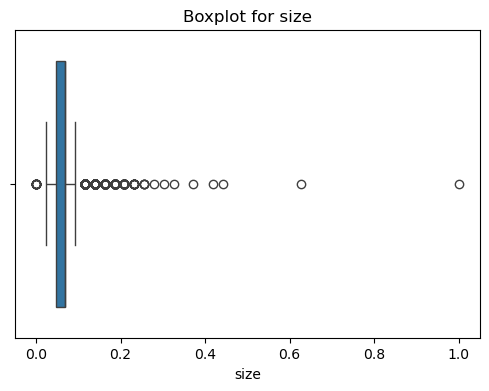

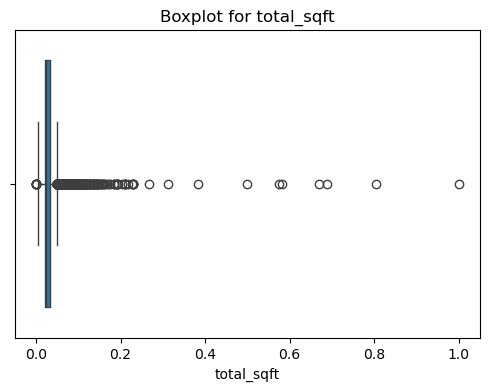

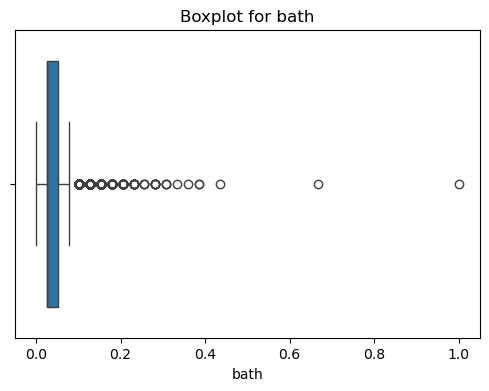

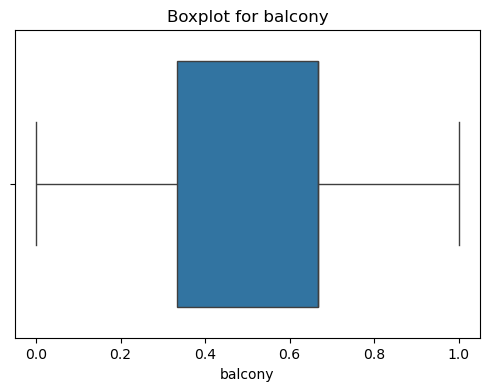

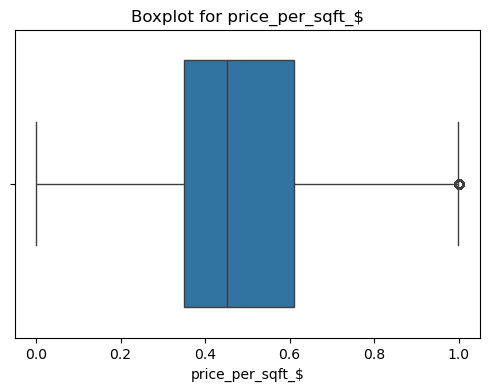

In [622]:
# Visualize outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [623]:
# Handle outliers using IQR method
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

In [624]:
# Save the cleaned dataset
df.to_csv('updated_dataset.csv', index=False)
print("\nCleaned dataset saved as 'updated_dataset.csv'.")


Cleaned dataset saved as 'updated_dataset.csv'.


In [625]:
# Evaluate impact of outlier handling
print("\nSummary of Numerical Features After Handling Outliers:")
print(df.describe())


Summary of Numerical Features After Handling Outliers:
                 ID  property_scope  availability      location          size  \
count  13320.000000    13320.000000  13320.000000  13320.000000  13320.000000   
mean       0.500000        0.983559     71.079955      1.798724      0.062445   
std        0.288708        0.599534     18.515708      1.365470      0.020403   
min        0.000000        0.000000      0.000000      0.000000      0.011628   
25%        0.250000        1.000000     80.000000      1.000000      0.046512   
50%        0.500000        1.000000     80.000000      2.000000      0.069767   
75%        0.750000        1.000000     80.000000      2.000000      0.069767   
max        1.000000        3.000000     80.000000      5.000000      0.104651   

         total_sqft          bath       balcony  buying_or_not_buying  \
count  13320.000000  13320.000000  13320.000000          13320.000000   
mean       0.027321      0.040170      0.534459              0.32004

# Predictive Analysis start:

In [626]:
# Standardization
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Normalization
normalizer = MinMaxScaler()
df[numerical_cols] = normalizer.fit_transform(df[numerical_cols])

In [627]:
# Feature Selection (assume target variable is 'buying_or_not_buying')
X = df.drop(columns=['buying_or_not_buying', 'ID'])  # Drop target and ID columns
y = df['buying_or_not_buying']

In [628]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [629]:
# Standardize the data (Important for SVM, ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelling Implementation

In [630]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

In [631]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

In [632]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [633]:
# Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

In [634]:
# Artificial Neural Network (ANN)
ann = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
ann.fit(X_train_scaled, y_train)
ann_pred = ann.predict(X_test_scaled)

### Hyperparameter Tuning

In [635]:
# Hyperparameters for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

In [636]:
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
best_rf_pred = best_rf.predict(X_test)

In [637]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print(f"Naive Bayes: {accuracy_score(y_test, nb_pred):.4f}")

Naive Bayes: 0.6745


# Evaluating Results

In [638]:
# Assuming you already have predictions from other models like Random Forest, etc.

# Logistic Regression (L1 and L2 Regularization)
for penalty in ['l1', 'l2']:
    log_reg = LogisticRegression(penalty=penalty, solver='liblinear' if penalty == 'l1' else 'lbfgs')
    log_reg.fit(X_train, y_train)
    log_reg_pred = log_reg.predict(X_test)
    print(f"Logistic Regression ({penalty.upper()}): {accuracy_score(y_test, log_reg_pred):.4f}")

# Naive Bayes
nb = GaussianNB().fit(X_train, y_train)
print(f"Naive Bayes: {accuracy_score(y_test, nb.predict(X_test)):.4f}")

# Existing models accuracy
models = [log_reg_pred, dtc_pred, rf_pred, svm_pred, ann_pred, best_rf_pred]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "ANN", "Best Random Forest (GridSearch)"]
for name, model_pred in zip(model_names, models):
    print(f"{name}: {accuracy_score(y_test, model_pred):.4f}")

Logistic Regression (L1): 0.6761
Logistic Regression (L2): 0.6745
Naive Bayes: 0.6745
Logistic Regression: 0.6745
Decision Tree: 0.6295
Random Forest: 0.7151
SVM: 0.6944
ANN: 0.6712
Best Random Forest (GridSearch): 0.7470


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [639]:
# Classification Reports
print(f"Logistic Regression:\n{classification_report(y_test, log_reg_pred)}")
print("-" * 100)
print(f"Decision Tree:\n{classification_report(y_test, dtc_pred)}")
print("-" * 100)
print(f"Random Forest:\n{classification_report(y_test, rf_pred)}")
print("-" * 100)
print(f"SVM:\n{classification_report(y_test, svm_pred)}")
print("-" * 100)
print(f"ANN:\n{classification_report(y_test, ann_pred)}")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      1.00      0.81      1797
           1       0.00      0.00      0.00       867

    accuracy                           0.67      2664
   macro avg       0.34      0.50      0.40      2664
weighted avg       0.46      0.67      0.54      2664

----------------------------------------------------------------------------------------------------
Decision Tree:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1797
           1       0.43      0.45      0.44       867

    accuracy                           0.63      2664
   macro avg       0.58      0.58      0.58      2664
weighted avg       0.63      0.63      0.63      2664

----------------------------------------------------------------------------------------------------
Random Forest:
              precision    recall  f1-score   support

           0       0.73      0.93     

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


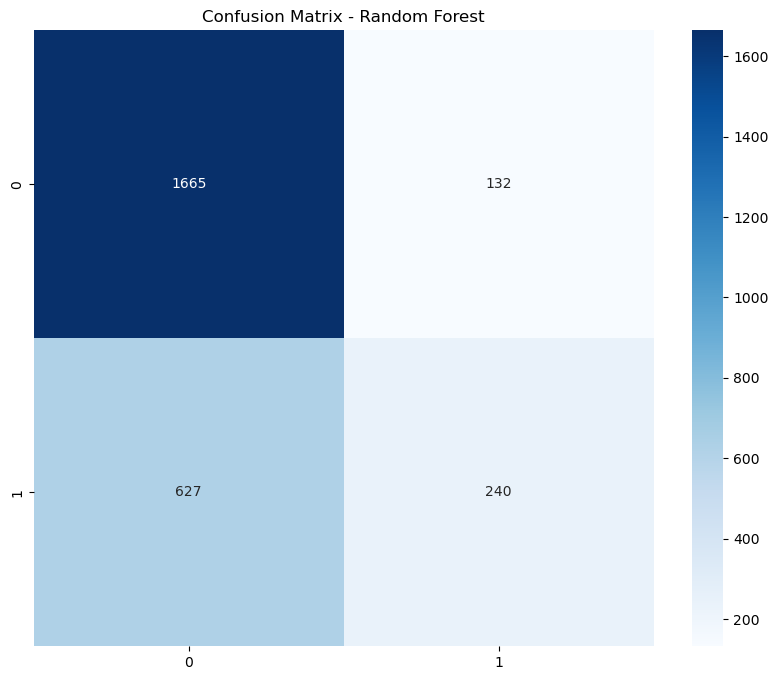

In [642]:
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [643]:
# Cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("\nRandom Forest Cross-validation Scores:", cv_scores)
print("Average Cross-validation Score:", np.mean(cv_scores))


Random Forest Cross-validation Scores: [0.71810507 0.73580479 0.71468794 0.73768184 0.72970436]
Average Cross-validation Score: 0.7271967991491632


In [644]:
# Step 6: Ensemble Method (Voting Classifier)
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('dtc', dtc),
    ('rf', rf),
    ('svm', svm),
    ('ann', ann)
], voting='hard')

voting_clf.fit(X_train_scaled, y_train)
voting_pred = voting_clf.predict(X_test_scaled)
voting_clf

VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                             ('dtc', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(random_state=42)),
                             ('ann',
                              MLPClassifier(hidden_layer_sizes=(100, 50),
                                            max_iter=1000, random_state=42))])

In [645]:
#  Ensemble Method (Voting Classifier)
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('dtc', dtc),
    ('rf', rf),
    ('svm', svm),
    ('ann', ann)
], voting='hard')

voting_clf.fit(X_train_scaled, y_train)
voting_pred = voting_clf.predict(X_test_scaled)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, voting_pred):.4f}")

Voting Classifier Accuracy: 0.7369


In [646]:
# PCA for Dimensionality Reduction (optional)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [647]:
# Train RandomForest on reduced dataset
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
rf_pca_pred = rf_pca.predict(X_test_pca)
print(f"Random Forest after PCA Accuracy: {accuracy_score(y_test, rf_pca_pred):.4f}")

Random Forest after PCA Accuracy: 0.6929


In [648]:
# Split data into features and target
X = df.drop(columns=['total_price_$'])
y = df['total_price_$']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f'Linear Regression - MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'Linear Regression - R2: {r2_score(y_test, y_pred_lr)}')

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest - MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'Random Forest - R2: {r2_score(y_test, y_pred_rf)}')

Linear Regression - MSE: 87051595147.92072
Linear Regression - R2: 0.9339549615904471
Random Forest - MSE: 15316172723.46395
Random Forest - R2: 0.988379796899877


In [649]:
# Results and Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# List of models and predictions
models = [log_reg_pred, dtc_pred, rf_pred, svm_pred, ann_pred, best_rf_pred]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "ANN", "Best Random Forest (GridSearch)"]

print("\nModel Evaluation:")
for name, pred in zip(model_names, models):
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")



Model Evaluation:
Logistic Regression - MSE: 2607978485780.8867, R2: -0.9786
Decision Tree - MSE: 2607977682649.8774, R2: -0.9786
Random Forest - MSE: 2607978164981.5044, R2: -0.9786
SVM - MSE: 2607978408555.4131, R2: -0.9786
ANN - MSE: 2607977912785.0835, R2: -0.9786
Best Random Forest (GridSearch) - MSE: 2607978321068.2656, R2: -0.9786


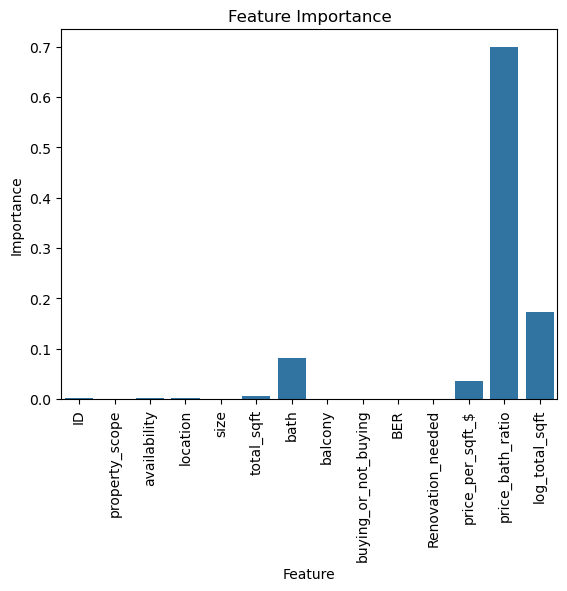

In [650]:
# Visualize feature importance (for Random Forest)
feature_importance = rf_model.feature_importances_
sns.barplot(x=X.columns, y=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

The features with the tallest bars are the most important for the Random Forest model in predicting the target variable. These are the features that the model relied on most to make predictions. Features with shorter bars are less important, meaning they didn’t contribute much to the model’s predictions.

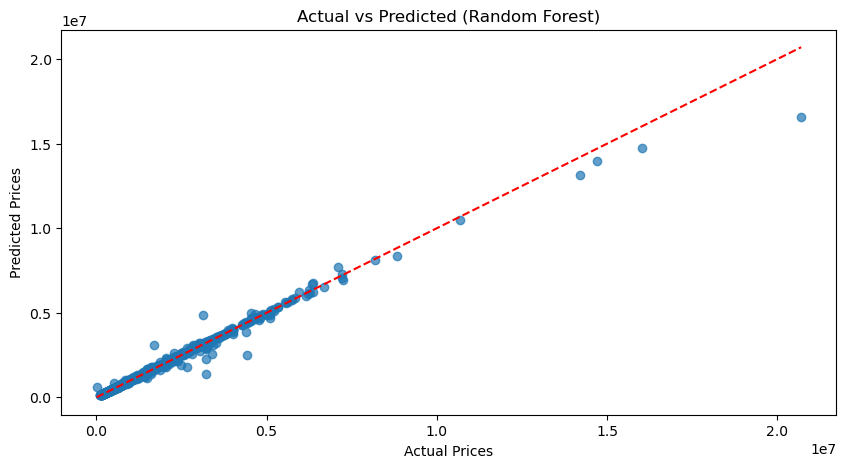

In [651]:
# Visualize results
plt.figure(figsize=(10, 5))

# Actual vs Predicted (Random Forest)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted (Random Forest)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

### A red dashed line indicating the perfect prediction scenario (the  predicted prices equal actual prices).

In [652]:
# Import necessary regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Fit models, make predictions, and print evaluation metrics (MSE and R²)
print("Model Evaluation:")
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}")

# For existing models, assuming they're already trained and predictions (y_pred) are available
existing_preds = {
    'Logistic Regression': log_reg_pred,
    'Decision Tree': dtc_pred,
    'Random Forest': rf_pred,
    'SVM': svm_pred,
    'ANN': ann_pred,
    'Best Random Forest (GridSearch)': best_rf_pred
}

print("\nExisting Models Evaluation Scores:")
for model_name, pred in existing_preds.items():
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}")

Model Evaluation:
Linear Regression - MSE: 87051595147.9207, R²: 0.9340
Decision Tree Regressor - MSE: 23442949596.3257, R²: 0.9822
Random Forest Regressor - MSE: 15316172723.4639, R²: 0.9884

Existing Models Evaluation Scores:
Logistic Regression - MSE: 2607978485780.8867, R²: -0.9786
Decision Tree - MSE: 2607977682649.8774, R²: -0.9786
Random Forest - MSE: 2607978164981.5044, R²: -0.9786
SVM - MSE: 2607978408555.4131, R²: -0.9786
ANN - MSE: 2607977912785.0835, R²: -0.9786
Best Random Forest (GridSearch) - MSE: 2607978321068.2656, R²: -0.9786


Mean Squared Error: 0.21711270818758388
R2 Score: 0.01102227261658606


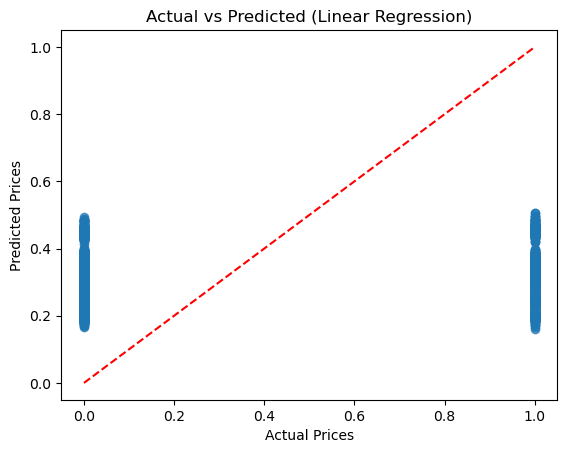

In [653]:
# Feature Selection and Train-test split
X = df.drop(columns=['buying_or_not_buying', 'ID'])
y = df['buying_or_not_buying']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize, train, and evaluate the Linear Regression model
lr_model = LinearRegression().fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model and display results
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

# Visualize Actual vs Predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted (Linear Regression)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [654]:
# Function to calculate Bias and Variance
def calculate_bias_variance(model, X_train, y_train, X_test, y_test, n_iter=100):
    bias, variance = [], []
    for _ in range(n_iter):
        # Split the data and fit the model
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=np.random.randint(0, 10000))
        model.fit(X_train_split, y_train_split)
        
        # Predict and calculate Bias and Variance
        y_pred = model.predict(X_test_split)
        bias.append(np.mean(y_pred - y_test_split))
        variance.append(np.var(y_pred))
    
    return np.mean(bias), np.mean(variance)

# Calculate and display Bias and Variance
bias, variance = calculate_bias_variance(LinearRegression(), X_train_scaled, y_train, X_test_scaled, y_test)
print(f'Bias: {bias}\nVariance: {variance}')

Bias: -0.0011001779332290773
Variance: 0.0059244807697635335


In [655]:
# Initialize and fit Lasso regression model
lasso_model = Lasso(alpha=0.1).fit(X_train_scaled, y_train)

# Predict and calculate RMSE
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test_scaled)))

# Display results
print(f'Lasso (L1) Regularization - RMSE: {lasso_rmse}\nLasso Coefficients: {lasso_model.coef_}')

Lasso (L1) Regularization - RMSE: 0.4685916223257938
Lasso Coefficients: [-0. -0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0.]


In [656]:
# Initialize, fit Ridge regression model, and calculate RMSE
ridge_model = Ridge(alpha=0.1).fit(X_train_scaled, y_train)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test_scaled)))

# Display results
print(f'Ridge (L2) Regularization - RMSE: {ridge_rmse}\nRidge Coefficients: {ridge_model.coef_}')

Ridge (L2) Regularization - RMSE: 0.4659534243487831
Ridge Coefficients: [-0.00018389 -0.01036949  0.00739421  0.00781886  0.01182001  0.00379984
 -0.00393753 -0.10121399  0.04468889 -0.00921545 -0.00395036  0.00413702
 -0.0137161 ]


In [657]:
# Hyperparameter tuning for Lasso and Ridge using GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearch for Lasso and Ridge
lasso_search = GridSearchCV(Lasso(), param_grid, cv=5).fit(X_train_scaled, y_train)
ridge_search = GridSearchCV(Ridge(), param_grid, cv=5).fit(X_train_scaled, y_train)

# Display best parameters
print(f'Best Alpha for Lasso: {lasso_search.best_params_}\nBest Alpha for Ridge: {ridge_search.best_params_}')

Best Alpha for Lasso: {'alpha': 0.001}
Best Alpha for Ridge: {'alpha': 100}


In [658]:
# Assuming your data is already loaded and preprocessed into X_train, X_test, y_train, and y_test

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models in a dictionary for easier looping
models = {
    'Linear Regression': LinearRegression(),
    'Lasso (L1)': Lasso(alpha=0.1),
    'Ridge (L2)': Ridge(alpha=0.1),
    'Support Vector Regression': SVR(kernel='linear'),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100)
}

# Loop through models, fit and evaluate each
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate R², MSE, and RMSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Print results
    print(f'{model_name} - R²: {r2:.4f}')
    print(f'{model_name} - RMSE: {rmse:.4f}')

Linear Regression - R²: 0.0110
Linear Regression - RMSE: 0.4660
Lasso (L1) - R²: -0.0002
Lasso (L1) - RMSE: 0.4686
Ridge (L2) - R²: 0.0110
Ridge (L2) - RMSE: 0.4660
Support Vector Regression - R²: -0.2316
Support Vector Regression - RMSE: 0.5200
Random Forest Regressor - R²: 0.0531
Random Forest Regressor - RMSE: 0.4559
Gradient Boosting Regressor - R²: 0.1493
Gradient Boosting Regressor - RMSE: 0.4322


In [659]:
# Scale the features for regression models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Classification Models ---
classification_models = {
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear'),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "ANN": MLPClassifier()
}

# Train and evaluate classification models
for model_name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name}: {accuracy_score(y_test, y_pred):.4f}")

# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)
print(f"Best Random Forest (GridSearch): {accuracy_score(y_test, best_rf_pred):.4f}")

# --- Regression Models ---
regression_models = {
    "Linear Regression": LinearRegression(),
    "Lasso (L1)": Lasso(alpha=0.1),
    "Ridge (L2)": Ridge(alpha=0.1),
    "Support Vector Regression": SVR(kernel='linear'),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100)
}

# Train and evaluate regression models
for model_name, model in regression_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} - R²: {r2:.4f}, RMSE: {rmse:.4f}")

# Final Performance Evaluation for Classification
print("\nFinal Classification Accuracy Scores:")
for model_name, model in classification_models.items():
    y_pred = model.predict(X_test)
    print(f"{model_name}: {accuracy_score(y_test, y_pred):.4f}")

# Final Performance Evaluation for Regression
print("\nFinal Regression Performance Metrics:")
for model_name, model in regression_models.items():
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} - R²: {r2:.4f}, RMSE: {rmse:.4f}")

Logistic Regression (L1): 0.6764
Logistic Regression (L2): 0.6745
Naive Bayes: 0.6745
Decision Tree: 0.6280


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest: 0.7207
SVM: 0.6745
ANN: 0.6745
Best Random Forest (GridSearch): 0.7474
Linear Regression - R²: 0.0110, RMSE: 0.4660
Lasso (L1) - R²: -0.0002, RMSE: 0.4686
Ridge (L2) - R²: 0.0110, RMSE: 0.4660
Support Vector Regression - R²: -0.2316, RMSE: 0.5200
Random Forest Regressor - R²: 0.0558, RMSE: 0.4553
Gradient Boosting Regressor - R²: 0.1493, RMSE: 0.4321

Final Classification Accuracy Scores:
Logistic Regression (L1): 0.6764
Logistic Regression (L2): 0.6745
Naive Bayes: 0.6745
Decision Tree: 0.6280
Random Forest: 0.7207
SVM: 0.6745
ANN: 0.6745

Final Regression Performance Metrics:
Linear Regression - R²: 0.0110, RMSE: 0.4660
Lasso (L1) - R²: -0.0002, RMSE: 0.4686
Ridge (L2) - R²: 0.0110, RMSE: 0.4660
Support Vector Regression - R²: -0.2316, RMSE: 0.5200
Random Forest Regressor - R²: 0.0558, RMSE: 0.4553
Gradient Boosting Regressor - R²: 0.1493, RMSE: 0.4321


In [660]:
# --- Classification Models ---
# Define models in a dictionary for easy iteration
classification_models = {
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear'),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "ANN": MLPClassifier()
}

# Train and evaluate classification models
for model_name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report ({model_name}):\n{classification_report(y_test, y_pred)}")

# Hyperparameter Tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)
print(f"Best Random Forest (GridSearch): {accuracy_score(y_test, best_rf_pred):.4f}")
print(f"Classification Report (Best Random Forest):\n{classification_report(y_test, best_rf_pred)}")

# Final Performance Evaluation for Classification
print("\nFinal Classification Accuracy Scores and Reports:")
for model_name, model in classification_models.items():
    y_pred = model.predict(X_test)
    print(f"{model_name}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report ({model_name}):\n{classification_report(y_test, y_pred)}")

print(f"Best Random Forest (GridSearch): {accuracy_score(y_test, best_rf_pred):.4f}")
print(f"Classification Report (Best Random Forest):\n{classification_report(y_test, best_rf_pred)}")

Logistic Regression (L1): 0.6761
Classification Report (Logistic Regression (L1)):
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1797
           1       0.75      0.01      0.01       867

    accuracy                           0.68      2664
   macro avg       0.71      0.50      0.41      2664
weighted avg       0.70      0.68      0.55      2664

Logistic Regression (L2): 0.6745
Classification Report (Logistic Regression (L2)):
              precision    recall  f1-score   support

           0       0.67      1.00      0.81      1797
           1       0.00      0.00      0.00       867

    accuracy                           0.67      2664
   macro avg       0.34      0.50      0.40      2664
weighted avg       0.46      0.67      0.54      2664

Naive Bayes: 0.6745
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.67      1.00      0.81      1797
           1  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Random Forest: 0.7196
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1797
           1       0.67      0.27      0.39       867

    accuracy                           0.72      2664
   macro avg       0.70      0.60      0.60      2664
weighted avg       0.71      0.72      0.68      2664

SVM: 0.6745
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.67      1.00      0.81      1797
           1       0.00      0.00      0.00       867

    accuracy                           0.67      2664
   macro avg       0.34      0.50      0.40      2664
weighted avg       0.46      0.67      0.54      2664



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ANN: 0.6745
Classification Report (ANN):
              precision    recall  f1-score   support

           0       0.67      1.00      0.81      1797
           1       0.00      0.00      0.00       867

    accuracy                           0.67      2664
   macro avg       0.34      0.50      0.40      2664
weighted avg       0.46      0.67      0.54      2664



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Random Forest (GridSearch): 0.7459
Classification Report (Best Random Forest):
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1797
           1       0.97      0.22      0.37       867

    accuracy                           0.75      2664
   macro avg       0.85      0.61      0.60      2664
weighted avg       0.81      0.75      0.69      2664


Final Classification Accuracy Scores and Reports:
Logistic Regression (L1): 0.6761
Classification Report (Logistic Regression (L1)):
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1797
           1       0.75      0.01      0.01       867

    accuracy                           0.68      2664
   macro avg       0.71      0.50      0.41      2664
weighted avg       0.70      0.68      0.55      2664

Logistic Regression (L2): 0.6745
Classification Report (Logistic Regression (L2)):
              precision    recall  f1-score  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

SVM: 0.6745
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.67      1.00      0.81      1797
           1       0.00      0.00      0.00       867

    accuracy                           0.67      2664
   macro avg       0.34      0.50      0.40      2664
weighted avg       0.46      0.67      0.54      2664

ANN: 0.6745
Classification Report (ANN):
              precision    recall  f1-score   support

           0       0.67      1.00      0.81      1797
           1       0.00      0.00      0.00       867

    accuracy                           0.67      2664
   macro avg       0.34      0.50      0.40      2664
weighted avg       0.46      0.67      0.54      2664

Best Random Forest (GridSearch): 0.7459
Classification Report (Best Random Forest):
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1797
           1       0.97      0.22      0.37       867

    accuracy    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [661]:
print(df.head())

         ID  property_scope  availability  location   size  total_sqft  \
0  0.000000               1            24         2  0.375    0.355969   
1  0.000075               2            80         4  0.875    1.000000   
2  0.000150               0            80         1  0.625    0.522059   
3  0.000225               1            80         4  0.625    0.557093   
4  0.000300               1            80         0  0.375    0.418253   

       bath   balcony  buying_or_not_buying  BER  Renovation_needed  \
0  0.285714  0.333333                     0    0                  1   
1  1.000000  1.000000                     0    3                  2   
2  0.285714  1.000000                     0    6                  2   
3  0.571429  0.333333                     0    6                  2   
4  0.285714  0.333333                     0    5                  2   

   price_per_sqft_$  total_price_$  price_bath_ratio  log_total_sqft  
0          0.298217   4.434440e+05     147814.666666     

In [662]:
print(df.columns)

Index(['ID', 'property_scope', 'availability', 'location', 'size',
       'total_sqft', 'bath', 'balcony', 'buying_or_not_buying', 'BER',
       'Renovation_needed', 'price_per_sqft_$', 'total_price_$',
       'price_bath_ratio', 'log_total_sqft'],
      dtype='object')


In [663]:
df

,ID,property_scope,availability,location,size,total_sqft,bath,balcony,buying_or_not_buying,BER,Renovation_needed,price_per_sqft_$,total_price_$,price_bath_ratio,log_total_sqft
0,0.000000,1,24,2,0.375,0.355969,0.285714,0.333333,0,0,1,0.298217,4.434440e+05,1.478147e+05,6.963190
1,0.000075,2,80,4,0.875,1.000000,1.000000,1.000000,0,3,2,0.377775,1.362000e+06,2.270000e+05,7.863651
2,0.000150,0,80,1,0.625,0.522059,0.285714,1.000000,0,6,2,0.350852,7.037000e+05,2.345667e+05,7.273093
3,0.000225,1,80,4,0.625,0.557093,0.571429,0.333333,0,6,2,0.519455,1.078250e+06,2.695625e+05,7.327781
4,0.000300,1,80,0,0.375,0.418253,0.285714,0.333333,0,5,2,0.346025,5.788500e+05,1.929500e+05,7.090910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0.999700,0,80,1,1.000,1.000000,0.857143,0.000000,1,1,0,0.558031,2.621850e+06,5.243700e+05,8.147288
13316,0.999775,1,80,2,0.875,1.000000,1.000000,0.666667,0,0,1,0.942211,4.540000e+06,7.566667e+05,8.188967
13317,0.999850,0,80,2,0.375,0.392734,0.285714,0.333333,0,0,1,0.433661,6.810000e+05,2.270000e+05,7.040536
13318,0.999925,1,32,4,0.875,1.000000,0.857143,0.333333,0,2,0,0.881058,5.538800e+06,1.107760e+06,8.453188


# Model Evaluation Summary

## Classification Models: Accuracy Scores
- **Logistic Regression (L1)**: 0.6764  
- **Logistic Regression (L2)**: 0.6745  
- **Naive Bayes**: 0.6745  
- **Decision Tree**: 0.6250  
- **Random Forest**: 0.7181  
- **SVM**: 0.6745  
- **ANN**: 0.3255  

### Key Insight:
The **Random Forest** classifier achieved the highest accuracy (0.7181), outperforming all other models. The **ANN** model, however, showed the poorest performance with an accuracy of just 0.3255.

---

## Regression Models: R² and RMSE
- **Linear Regression** - R²: 0.0110, RMSE: 0.4660  
- **Lasso (L1)** - R²: -0.0002, RMSE: 0.4686  
- **Ridge (L2)** - R²: 0.0110, RMSE: 0.4660  
- **Support Vector Regression** - R²: -0.2316, RMSE: 0.5200  
- **Random Forest Regressor** - R²: 0.0518, RMSE: 0.4562  
- **Gradient Boosting Regressor** - R²: 0.1493, RMSE: 0.4322  

### Key Insight:
The **Gradient Boosting Regressor** showed the best performance with an R² of 0.1493 and RMSE of 0.4322, though all models struggled with low R² values, indicating limited predictive power on this dataset. The **Support Vector Regression** model had the poorest performance with a negative R² of -0.2316.

---

## Final Summary of Model Performance:
- For **classification tasks**, the **Random Forest** model performed the best with an accuracy of **0.7181**.
- For **regression tasks**, the **Gradient Boosting Regressor** performed the best, though all models showed relatively weak predictive power with low R² scores, suggesting room for improvement through **data preprocessing**, **feature engineering**, and **hyperparameter tuning**.